In [108]:

url="https://raw.githubusercontent.com/DavidePosillipo/ProbabilityAndStatistics/master/Assignment_4/wines_properties.csv"
df = pd.read_csv(url)

In [109]:
df.columns = ["Alcohol", "Malic_Acid", "Ash", "Ash_Alcanity", "Magnesium", "Total_Phenols", "Flavanoids", "Nonflavanoid_Phenols", "Proanthocyanins","Color_Intensity","Hue", "OD28", "Proline", "Customer_Segment"]
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD28', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [13]:
# I need the description in order to identify the quartile. 
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [131]:
# I need to add a constant in the exogenous part;

# we also have to do something about the last categorical variable "costumer_segment",  we create three dummies and then add 2 at the regression
dummy_segment = pd.get_dummies(df['Customer_Segment'], prefix='Customer_Segment')
exog = sm.add_constant( df.iloc[:,1:12].join(dummy_segment.iloc[:,0:2]))

In [132]:
#endogenous part is my dependent variable;
endog = df['Alcohol']
model = sm.OLS(endog, exog ).fit()
predictions = model.predict(exog)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                Alcohol   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     24.68
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           3.85e-32
Time:                        12:30:31   Log-Likelihood:                -118.49
No. Observations:                 178   AIC:                             265.0
Df Residuals:                     164   BIC:                             309.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.2026 

regression = sm.OLS(endog, exog)
result = regression.fit()

The table above reports the summary statistics for the OLS regression. The percentage of the dependent variable’s variance explained by the 13 independent variables is  high: the overall R square is 0.662. The same can be stated if looking at the Adjusted R square. 

Moreover, the null hypothesis of the overall F-test is rejected at any level of significance (p-value < 0.01). This means the combination of the covariates is significant in predicting the model.

According to the table, the variables that are significative (p- value < 0.01) in predicting the percentage of alcohol of the wine are Malic_Acid, Color_Intensity, Proline and Customer_Segment: in detail, the first three have a positive impact on the dependent variable, while the latter exerts a negative influence on it. 

## EX  2

In [133]:
#The intercept must be defined before defining the dummy, because the intercept
#goes in the exogenous part. 
df['intercept'] = 1.0
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD28,Proline,Customer_Segment,intercept,Alcohol_dummy
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1.0,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,1.0,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,1.0,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,1.0,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1.0,0


In [134]:
# 13.677500 can be obtained in the describe table
#this is an efficient part of defining a dummy. 
df['Alcohol_dummy'] = (df["Alcohol"]) >= df.quantile(q=0.75, axis=0)["Alcohol"]
df[['Alcohol_dummy']].astype(int).head()



,Alcohol_dummy
0,1
1,0
2,0
3,1
4,0


In [135]:
df[['Alcohol_dummy']]= df[['Alcohol_dummy']].astype(int)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD28,Proline,Customer_Segment,intercept,Alcohol_dummy
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1.0,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,1.0,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,1.0,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,1.0,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1.0,0


In [143]:
endog = df["Alcohol_dummy"]

In [144]:
# or df.iloc[:, 1:-1] 
# cambiatpo qui perchè sennò includevamo alcohol dummy come exogena 

dummy_segment = pd.get_dummies(df['Customer_Segment'], prefix='Customer_Segment')
exog = sm.add_constant( df.iloc[:,1:13].join(dummy_segment.iloc[:,0:2]))
exog

,const,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD28,Proline,Customer_Segment_1,Customer_Segment_2
0,1.0,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065,1,0
1,1.0,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050,1,0
2,1.0,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185,1,0
3,1.0,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480,1,0
4,1.0,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735,1,0
5,1.0,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450,1,0
6,1.0,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290,1,0
7,1.0,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295,1,0
8,1.0,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045,1,0
9,1.0,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045,1,0


In [145]:
logit = sm.Logit(endog, exog)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.316661
         Iterations 9


In [146]:
print(result.summary2())

                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.440     
Dependent Variable:    Alcohol_dummy     AIC:               142.7312  
Date:                  2018-12-11 12:32  BIC:               190.4580  
No. Observations:      178               Log-Likelihood:    -56.366   
Df Model:              14                LL-Null:           -100.64   
Df Residuals:          163               LLR p-value:       7.1213e-13
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        9.0000                                         
----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------
const                -12.9190   4.7726 -2.7069 0.0068 -22.2732 -3.5648
Malic_Acid             0.5382   0.3159  1.7035 0.0885  -0.0810  1.1574
Ash                   -0.6709   1.

We created a dummy variable using a threshold equivalent to the 75th percentile: the wine is considered strong if the variable alcohol is >= 13.6775 (in this case it assumes value = 1) and weak (value = 0) if the degrees of alcohol are less than 13.6775.

In order to evaluate the goodness of the estimate we are now looking at Pseudo R-squared. It has a value of 0.440: this means that the model has a quite high predicting power.

In this case, the only variables that seems significative in affecting the probability that the wine is considered strong or weak are Malic_Acid (p-value < 0.085) and Color_Intensity (p-value < 0.0018): in particular for every unit change in Malic Acid the log odds of the wine's strenght, against its weakness, increase by 0.4899 (in the case of Color_Intensity by 0.6635). Therefore, the coefficients associated to these variables represent, after some necessary transformation and interpretation, the variation in the probability that the event will occurr (so that y = 1) following a unitary variation of the predictor variable. 

## Ex 3

In [30]:
import pandas as pd
import seaborn as sns

In [59]:
ds = df.iloc[:, 1:13]
ds
# we did not include the Costumer_segment variable, since it was cathegorical 

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


In [61]:
from sklearn.preprocessing import StandardScaler
ds_Standard = pd.DataFrame(StandardScaler().fit_transform(ds), columns= df.columns[1:13])
ds_Standard

# it might be faster to work with np arrays, so you have only to use
ds_Standard = StandardScaler().fit_transform(ds)

In [62]:
mean_vector = np.mean(ds_Standard, axis = 0)
N = ds_Standard.shape[0]
covariance_matrix = (ds_Standard - mean_vector).T.dot( (ds_Standard - mean_vector) ) / (N - 1) #unbiased est.
covariance_matrix

array([[ 1.00564972,  0.16497228,  0.29013035, -0.05488343, -0.3370606 ,
        -0.41332866,  0.29463237, -0.22199334,  0.25039204, -0.56446685,
        -0.37079354, -0.19309537],
       [ 0.16497228,  1.00564972,  0.44587209,  0.28820583,  0.12970824,
         0.11572743,  0.1872826 ,  0.00970647,  0.2603499 , -0.07508874,
         0.00393333,  0.22488969],
       [ 0.29013035,  0.44587209,  1.00564972, -0.0838039 , -0.32292752,
        -0.353355  ,  0.36396647, -0.19844168,  0.01883781, -0.27550299,
        -0.27833221, -0.44308618],
       [-0.05488343,  0.28820583, -0.0838039 ,  1.00564972,  0.21561254,
         0.19688989, -0.25774204,  0.23777643,  0.20107967,  0.05571118,
         0.06637684,  0.39557317],
       [-0.3370606 ,  0.12970824, -0.32292752,  0.21561254,  1.00564972,
         0.86944804, -0.45247731,  0.61587304, -0.05544792,  0.43613151,
         0.70390388,  0.50092909],
       [-0.41332866,  0.11572743, -0.353355  ,  0.19688989,  0.86944804,
         1.00564972, -

In [88]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

print(pd.DataFrame(correlation_matrix))

# can be good for testing the goodness and asymptotically they will be equal 
correlation_matrix = np.corrcoef(ds_Standard.T)
eigen_values_corr, eigen_vectors_corr = np.linalg.eig(correlation_matrix)

print( "their difference is:", np.linalg.norm(eigen_values-eigen_values_corr)) #0.030871743331638547 quite similar tough
eigen_values
eigen_vectors
sorted_eigenvalues = sorted(eigen_values, reverse=True)
u, s, v = np.linalg.svd(ds_Standard.T)

tot_eig_vals = sum(eigen_values)
tot_eig_vals
sorted_eigenvalues = sorted(eigen_values, reverse=True)
variance_explained = [ (i / tot_eig_vals)*100 for i in sorted_eigenvalues ]
variance_explained
np.cumsum(variance_explained)
##4 components explain 75% of the variance

          0         1         2         3         4         5         6   \
0   1.000000  0.164045  0.288500 -0.054575 -0.335167 -0.411007  0.292977   
1   0.164045  1.000000  0.443367  0.286587  0.128980  0.115077  0.186230   
2   0.288500  0.443367  1.000000 -0.083333 -0.321113 -0.351370  0.361922   
3  -0.054575  0.286587 -0.083333  1.000000  0.214401  0.195784 -0.256294   
4  -0.335167  0.128980 -0.321113  0.214401  1.000000  0.864564 -0.449935   
5  -0.411007  0.115077 -0.351370  0.195784  0.864564  1.000000 -0.537900   
6   0.292977  0.186230  0.361922 -0.256294 -0.449935 -0.537900  1.000000   
7  -0.220746  0.009652 -0.197327  0.236441  0.612413  0.652692 -0.365845   
8   0.248985  0.258887  0.018732  0.199950 -0.055136 -0.172379  0.139057   
9  -0.561296 -0.074667 -0.273955  0.055398  0.433681  0.543479 -0.262640   
10 -0.368710  0.003911 -0.276769  0.066004  0.699949  0.787194 -0.503270   
11 -0.192011  0.223626 -0.440597  0.393351  0.498115  0.494193 -0.311385   

          7

array([ 38.61231788,  55.49347493,  66.87003122,  74.52677438,
        81.16309995,  86.24109272,  90.81376922,  93.54766395,
        95.68703488,  97.62432816,  99.13806849, 100.        ])

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

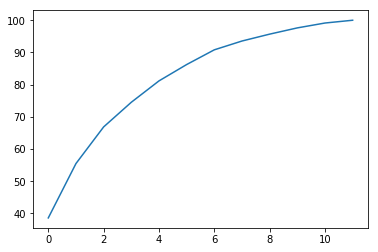

In [65]:
plt.plot(np.cumsum(variance_explained))

In [73]:
eigen_vectors_values = [ ( np.abs(eigen_values[i]), eigen_vectors[:, i] ) 
                        for i in range(len(eigen_values)) ]
eigen_vectors_values.sort()                        
eigen_vectors_values.reverse()
eigen_vectors_values[0][1].reshape(12, -1)

## Creating the top-4 eigenvectors matrix - here we take the 4 components
top4_eigenvectors = np.hstack( ( eigen_vectors_values[0][1].reshape(12, -1), 
                             eigen_vectors_values[1][1].reshape(12, -1), eigen_vectors_values[2][1].reshape(12, -1),eigen_vectors_values[3][1].reshape(12, -1) ) )
ds_PCA = ds_Standard.dot(top4_eigenvectors)

## here we confirm the shape. 4 components and 178 obs
ds_PCA.shape

(178, 4)

In [48]:
##now we create a dataframe with the PC results

In [75]:
X_1 = pd.DataFrame(ds_PCA)

In [76]:
X_1

,0,1,2,3
0,3.078573,-1.219262,0.388070,-0.239523
1,2.190796,0.664568,1.922109,-0.291411
2,2.456441,-1.505811,-0.556489,0.723596
3,3.422750,-2.556058,0.703346,0.564575
4,0.948976,-1.329735,-1.760632,-0.411977
5,2.767315,-1.779850,0.944531,-0.506330
6,2.183755,-0.458037,0.805131,-0.028019
7,1.826321,-1.339857,0.002816,-1.189656
8,2.193834,0.203203,1.373910,0.092245
9,2.590002,-0.435609,1.006830,0.359340


thanks to the verimax ritation, that maximize in some sense the interpretability of the results with the "best" rotation, we can see that malic acid and color intensity (that were respectively 1 and 9 in the old numeration, while now 0 and 8) are important for PC3 (malic acid) and PC1(color). 
The most significant components are 0 and 1, with really low p-value.As we might notice, color intensity (that was significant for the first analysis) still remain there as important part of PC1 while malic acid is no longer significant for the regression.


In [165]:
##we add the intercept and the dummy variable
X_1['intercept'] = 1.0
X_1["Alcohol_dummy"] = df["Alcohol_dummy"]
X_1[['Alcohol_dummy']]= X_1[['Alcohol_dummy']].astype(int)
X_1.head()


,0,1,2,3,intercept,Alcohol_dummy
0,-3.078573,-1.219262,-0.388070,-0.239523,1.0,1
1,-2.190796,0.664568,-1.922109,-0.291411,1.0,0
2,-2.456441,-1.505811,0.556489,0.723596,1.0,0
3,-3.422750,-2.556058,-0.703346,0.564575,1.0,1
4,-0.948976,-1.329735,1.760632,-0.411977,1.0,0


In [166]:
endog_1 = X_1["Alcohol_dummy"]



In [79]:
exog_1 = X_1.iloc[:,0:5]
exog_1

,0,1,2,3,intercept
0,3.078573,-1.219262,0.388070,-0.239523,1.0
1,2.190796,0.664568,1.922109,-0.291411,1.0
2,2.456441,-1.505811,-0.556489,0.723596,1.0
3,3.422750,-2.556058,0.703346,0.564575,1.0
4,0.948976,-1.329735,-1.760632,-0.411977,1.0
5,2.767315,-1.779850,0.944531,-0.506330,1.0
6,2.183755,-0.458037,0.805131,-0.028019,1.0
7,1.826321,-1.339857,0.002816,-1.189656,1.0
8,2.193834,0.203203,1.373910,0.092245,1.0
9,2.590002,-0.435609,1.006830,0.359340,1.0


In [80]:
##Logit model

logit_1 = sm.Logit(endog_1, exog_1)
result_1 = logit_1.fit()
print(result_1.summary2())

Optimization terminated successfully.
         Current function value: 0.395535
         Iterations 7


                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.300     
Dependent Variable: Alcohol_dummy    AIC:              150.8103  
Date:               2018-12-11 09:45 BIC:              166.7193  
No. Observations:   178              Log-Likelihood:   -70.405   
Df Model:           4                LL-Null:          -100.64   
Df Residuals:       173              LLR p-value:      2.3084e-12
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
0              0.4335    0.0993   4.3657  0.0000   0.2389   0.6281
1             -0.9162    0.1930  -4.7474  0.0000  -1.2944  -0.5379
2              0.4677    0.1974   2.3698  0.0178   0.0809   0.8545
3              0.0912    0.228

## USING PCA built in for better interpretation

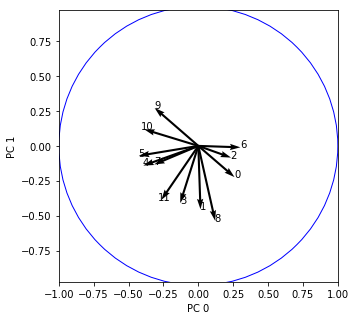

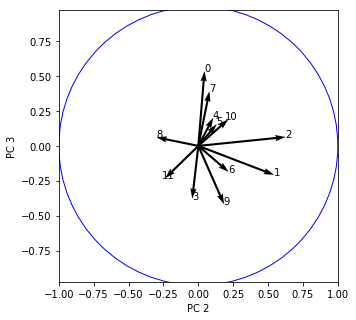

          0         1         2         3  intercept  Alcohol_dummy
0 -3.078573 -1.219262 -0.388070 -0.239523        1.0              1
1 -2.190796  0.664568 -1.922109 -0.291411        1.0              0
2 -2.456441 -1.505811  0.556489  0.723596        1.0              0
3 -3.422750 -2.556058 -0.703346  0.564575        1.0              1
4 -0.948976 -1.329735  1.760632 -0.411977        1.0              0
Optimization terminated successfully.
         Current function value: 0.395535
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.300     
Dependent Variable: Alcohol_dummy    AIC:              150.8103  
Date:               2018-12-12 20:09 BIC:              166.7193  
No. Observations:   178              Log-Likelihood:   -70.405   
Df Model:           4                LL-Null:          -100.64   
Df Residuals:       173              LLR p-value:      2.3084e-12
Converged:          1.0000           Scale:           

In [168]:
#excluding the cathegorical variables
ds = df.iloc[:, 1:13]
ds_Standard = pd.DataFrame(StandardScaler().fit_transform(ds), columns= df.columns[1:13])
ds_Standard.head()


# for a better interpretation of the components, could be useful to use the built in tool for pca
from sklearn.decomposition import PCA

my_pca = PCA(n_components=4)




pca = my_pca.fit(ds_Standard)
# Get the PCA components (loadings)
PCs = pca.components_

# Use quiver to generate the basic plot
fig = plt.figure(figsize=(5,5))
plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
           PCs[0,:], PCs[1,:], 
           angles='xy', scale_units='xy', scale=1)

# Add labels based on feature names (here just numbers)
feature_names = np.arange(PCs.shape[1])
for i,j,z in zip(PCs[1,:]+0.02, PCs[0,:]+0.02, feature_names):
    plt.text(j, i, z, ha='center', va='center')

# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-1.0,1.0])
plt.ylim([-1.0,1.0])

# Label axes
plt.xlabel('PC 0')
plt.ylabel('PC 1')

# Done
plt.show()


fig = plt.figure(figsize=(5,5))
plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
           PCs[2,:], PCs[3,:], 
           angles='xy', scale_units='xy', scale=1)

# Add labels based on feature names (here just numbers)
feature_names = np.arange(PCs.shape[1])
for i,j,z in zip(PCs[3,:]+0.02, PCs[2,:]+0.02, feature_names):
    plt.text(j, i, z, ha='center', va='center')

# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-1.0,1.0])
plt.ylim([-1.0,1.0])

# Label axes
plt.xlabel('PC 2')
plt.ylabel('PC 3')

# Done
plt.show()

new_projected_data = my_pca.fit_transform(ds_Standard)
PCs = my_pca.components_

X_1=pd.DataFrame(new_projected_data)
X_1['intercept'] = 1.0
X_1["Alcohol_dummy"] = df["Alcohol_dummy"]
X_1[['Alcohol_dummy']]= X_1[['Alcohol_dummy']].astype(int)
print(X_1.head())

endog_1 = X_1["Alcohol_dummy"]
exog_1 = X_1.iloc[:,0:5]
exog_1


logit_1 = sm.Logit(endog_1, exog_1)
result_1 = logit_1.fit()
print(result_1.summary2())



comparing the two regression, we can state that using only the first 4 components we lose lots of the R-squared. This might be caused by the lack of the costumer segment dummies

In [176]:
dummy_segment = pd.get_dummies(df['Customer_Segment'], prefix='Customer_Segment')
exog_1 = X_1.iloc[:,0:5]
exog_1 = exog_1.join(dummy_segment.iloc[:,0:2])
logit_1 = sm.Logit(endog_1, exog_1)
result_1 = logit_1.fit()
print(result_1.summary2())


Optimization terminated successfully.
         Current function value: 0.357431
         Iterations 8
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.368     
Dependent Variable:  Alcohol_dummy    AIC:              141.2455  
Date:                2018-12-12 20:16 BIC:              163.5180  
No. Observations:    178              Log-Likelihood:   -63.623   
Df Model:            6                LL-Null:          -100.64   
Df Residuals:        171              LLR p-value:      6.0582e-14
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      8.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
0                  -0.6602   0.3544 -1.8630 0.0625 -1.3548  0.0344
1                  -0.3270   0.2795 -1.1701 0.2420 -0

 now the results are more comparable, and we see a big improvement in the R- squared. Using only 4 components plus a categorical variable we achieved a remarkable result